In [1]:
from csv import reader
from random import random
import numpy as np
import math
from math import exp
trainFileName = "train.csv"
testFileName = "test.csv"
import matplotlib.pyplot as plt

In [2]:
def readDatasetFromCSV(fileName):
    Data = []
    with open(fileName, 'r') as file:
        csvReader = reader(file)
        next(csvReader, None)
        for row in csvReader:
            for i in range(1, 3):
                row[i] = float(row[i].strip())
            row[0] = int(row[0].strip())
            Data.append(row)
    # trainData = trainData[1:]
    return Data

#     firstRowFromCSV = trainData[0][1:]
#     firstRowFromCSVOutput = trainData[0][0]
def shuffleData(data):  
    np.random.shuffle(data)
    shuffleData = []
    shuffledOutput = []
    for row in data:
        shuffleData.append(row[1:])
        shuffledOutput.append(row[0])
    return shuffleData, shuffledOutput

# print(firstRowFromCSV)
# print(firstRowFromCSVOutput)

# for i in range(5):
#     print(trainingData[i], trainingOutput[i])

In [3]:
def createNetwork():
    numInputs = 2
    numHidden1 = 3
    numHidden2 = 3
    numOutput = 2
    hiddenLayer1 = [{'w': [random() for i in range(numInputs)]} for i in range(numHidden1)]
    # hiddenLayer1.append({'layer': 'hidden'})
    hiddenLayer2 = [{'w': [random() for i in range(numHidden1)]} for i in range(numHidden2)]
    # hiddenLayer2.append({'layer': 'hidden'})
    outputLayer = [{'w': [random() for i in range(numHidden2)]} for i in range(numOutput)]
    # outputLayer.append({'layer': 'output'})
    neuralNetwork = [hiddenLayer1, hiddenLayer2, outputLayer]
    return neuralNetwork
    x=[]
    W1 = []
    W2 = []
    W3 = []


In [4]:
def dotProduct(W, I):
    a=0.0
    for i in range(len(W)):
       a+=W[i]*I[i]
    return a

In [5]:
def softmaxActivationFunction(inputs):
    sum=0
    retVal=[]
    for i in range(len(inputs)):
        sum+= exp(inputs[i])
    retVal.append(exp(inputs[0]) / sum)
    retVal.append(exp(inputs[1]) / sum)
    return retVal

In [6]:
def reluActivationFunction(val):
    return max(0, val)

In [7]:
def derivative(val, i):
    if i==2:
        return val * (1.0 - val)
    else:
        if val<=0:
            return 0
        else:
            return 1

In [8]:
def forwardPropogation(network, data, drop):
#     print(network)
    currentData = data
    layerCount=0
    softmaxInputs=[]
    for layer in network:
        layerCount+=1
        nodeCount=-1
        activatedValues = []
        for node in layer:
            nodeCount+=1
            #If drop out - deactivate the node by setting output to 0
            if (layerCount==1 and nodeCount==drop[0]) or (layerCount==2 and nodeCount==drop[1]):
                node['o']=0.0
                activatedValues.append(node['o'])
                continue
#             print(node['w'])
            #Update to ignore the dropped node in second hidden layer
#             if layerCount==2:            
#                 prod = dotProduct(node['w'][:drop[0]]+node['w'][drop[0]+1:], currentData)
#             else:
            prod = dotProduct(node['w'], currentData)
#             print(prod)
            if(layerCount!=3):
                node['o'] = reluActivationFunction(prod)
#                 print(node['o'])
                activatedValues.append(node['o'])
            elif(layerCount==3):
                softmaxInputs.append(prod)
#                 print("Softmax:", softmaxInputs)
                if(len(softmaxInputs) == 2):
                    activatedValues = softmaxActivationFunction(softmaxInputs)
#                     print("activated: ", activatedValues)
                    layer[0]['o'] = activatedValues[0]
                    node['o'] = activatedValues[1]
        currentData = activatedValues
#     print("Summ Current Data: ", currentData[0], currentData[1])
    return currentData, network
    

In [9]:
def runForwardPropogation(nn, inputData, rowOutput, drop):
    fwdOutput, network = forwardPropogation(nn, inputData, drop)
#     print([trainData[0][:1], fwdOutput])
    loss = 0
    targetOutput=[]
    if(rowOutput == 1):
        targetOutput = [0, 1]
    elif (rowOutput == 0):
        targetOutput = [1, 0]
    for i in range(2):
        loss += pow((targetOutput[i] - fwdOutput[i]), 2)
    return fwdOutput, loss, targetOutput, network
    print(loss)
# print(nn)
#backwardPropogation(nn, targetOutput)


In [10]:
def backwardPropogation(network, targetOutput, drop):
    #using reverse order, i=2,1,0
    for i in reversed(range(len(network))):
        layer = network[i]
        error=[]
        #Output layer
        if i == len(network)-1:
            for j in range(len(layer)):
                neuron = layer[j]
                e = 2 * (targetOutput[j] - neuron['o'])
                error.append(e)
        #other layers
        else:
            for j in range(len(layer)):
                #Dropout code
                if (i==0 and j==drop[0]) or (i==1 and j==drop[1]):
                    error.append(0.0)
                    continue
                err=0.0
                for neuron in network[i+1]:
                    err+=(neuron['w'][j] * neuron['e'])
                error.append(err)
        for j in range(len(layer)):
            #Dropout code
#             if i==0 and j==drop[0]:
#                 continue
            neuron=layer[j]
            neuron['e'] = error[j] * derivative(neuron['o'], i)
    return network

In [11]:
def runBackwardPropogation(nn, targetOutput, inputData, learningRate, drop):
    nn = backwardPropogation(nn, targetOutput, drop)
#     for layer in nn:
#         print(layer, '\n\n')
    for i in range(len(nn)):
        neuronCount=-1
        inputVal=inputData
        #Dropout code
        if i!=0:
            inputVal = [neuron['o'] for neuron in nn[i-1]]
            #If dropped node, make input as 0
#             if i==1:
#                 inputVal[drop[0]]=0
        for neuron in nn[i]:
            neuronCount+=1
            #Dropout code
#             if i==0 and neuronCount==drop[0]:
#                 continue
            for j in range(len(inputVal)):
#                 if i==2 and j==drop[0]:
#                     continue
                neuron['w'][j] += learningRate * neuron['e'] * inputVal[j]
    return nn
# for layer in nn:
#     print(layer)

In [12]:
learningRate = 0.01
net = createNetwork()
data = readDatasetFromCSV(trainFileName)
lossPlot=[]
a=[0, 1, 2]
b=[0, 1, 2]
for it in range(100):
    shufData, shufOutput = shuffleData(data)
    sumLoss=0.0
    for i in range(len(shufData)):
        #adding one dropout unit to both the hidden layers
        dropout=[np.random.choice(a, 1, replace=False)[0], np.random.choice(b, 1, replace=False)[0]]
#         dropout = np.random.choice(a, 1)[0]
        observedOutput, loss, target, nt = runForwardPropogation(net, shufData[i], shufOutput[i], dropout)
        sumLoss+=loss
        net = runBackwardPropogation(nt, target, shufData[i], learningRate, dropout)
    sumLoss = sumLoss/len(shufData)
    print("-->epoch=", it+1, "/ 100   loss=", sumLoss)
#     for layer in net:
#         print(layer)
#     print("\n\n")
#     learningRate-=0.0005
    lossPlot.append(sumLoss)

-->epoch= 1 / 100   loss= 0.4974242798992358
-->epoch= 2 / 100   loss= 0.4324176630302893
-->epoch= 3 / 100   loss= 0.2981828488267208
-->epoch= 4 / 100   loss= 0.27231193566771134
-->epoch= 5 / 100   loss= 0.26826906744799817
-->epoch= 6 / 100   loss= 0.27151466805576796
-->epoch= 7 / 100   loss= 0.2632356884073203
-->epoch= 8 / 100   loss= 0.2678581855267633
-->epoch= 9 / 100   loss= 0.2620846893149713
-->epoch= 10 / 100   loss= 0.2644163155026921
-->epoch= 11 / 100   loss= 0.2607643923764768
-->epoch= 12 / 100   loss= 0.26493126856452826
-->epoch= 13 / 100   loss= 0.26397978985861464
-->epoch= 14 / 100   loss= 0.2599409432234546
-->epoch= 15 / 100   loss= 0.26554925401094903
-->epoch= 16 / 100   loss= 0.2697038344908987
-->epoch= 17 / 100   loss= 0.26515068671245384
-->epoch= 18 / 100   loss= 0.2668386146543973
-->epoch= 19 / 100   loss= 0.2623894718062597
-->epoch= 20 / 100   loss= 0.2642390798362045
-->epoch= 21 / 100   loss= 0.2663233119277206
-->epoch= 22 / 100   loss= 0.2612577

In [ ]:
%debug

In [13]:
print("Learned Weights\n")
for layer in net:
#     print(layer)
    for neuron in layer:
        print(neuron['w'])
    print("\n")

Learned Weights

[0.4162074294295555, -1.9289559873326374]
[-0.37267739624319557, 1.4195455716890684]
[-0.40321018339727693, 1.4748215570751892]


[-0.0372679460151482, 1.0723217964055498, 1.0439124669005106]
[-0.03325183661899581, 0.9359570360585597, 0.9001811839159967]
[1.6682641604993644, -0.24451828810708867, -0.15553376638946506]


[1.193873971160739, 1.4031135252658031, -0.38466730130131227]
[-0.4277162080582441, -0.31205590237363756, 1.895162364318533]




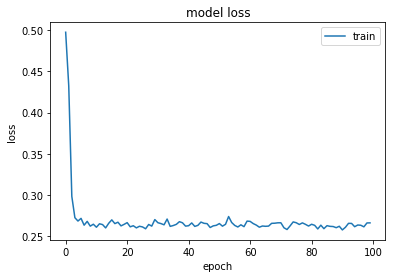

In [14]:
j=[]
for i in range(100):
    j.append(i)
plt.plot(np.asarray(j), np.asarray(lossPlot))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [15]:
def forwardPropogationOnTestData(network, data):
#     print(network)
    currentData = data
    layerCount=0
    softmaxInputs=[]
    for layer in network:
        layerCount+=1
        activatedValues = []
        for node in layer:
#             print(node['w'])
            prod = dotProduct(node['w'], currentData)
#             print(prod)
            if(layerCount!=3):
#                 if layerCount==1:
                node['o'] = reluActivationFunction(prod)*(2/3)
#                 else:
#                 node['o'] = reluActivationFunction(prod)
#                 print(node['o'])
                activatedValues.append(node['o'])
            elif(layerCount==3):
                softmaxInputs.append(prod)
#                 print("Softmax:", softmaxInputs)
                if(len(softmaxInputs) == 2):
                    activatedValues = softmaxActivationFunction(softmaxInputs)
#                     print("activated: ", activatedValues)
                    layer[0]['o'] = activatedValues[0]
                    node['o'] = activatedValues[1]
        currentData = activatedValues
#     print("Summ Current Data: ", currentData[0] + currentData[1])
    return currentData, network
    

In [16]:
def runForwardPropogationOnTestData(nn, inputData, rowOutput):
    fwdOutput, network = forwardPropogationOnTestData(nn, inputData)
#     print([trainData[0][:1], fwdOutput])
    loss = 0
    targetOutput=[]
    if(rowOutput == 1):
        targetOutput = [0, 1]
    elif (rowOutput == 0):
        targetOutput = [1, 0]
    for i in range(2):
        loss += pow((targetOutput[i] - fwdOutput[i]), 2)
    return fwdOutput, loss, targetOutput, network
    print(loss)
# print(nn)
#backwardPropogation(nn, targetOutput)



In [17]:
### Running on test data
testData = readDatasetFromCSV(testFileName)
testInput=[]
testOutput=[]
for row in testData:
    testInput.append(row[1:])
    testOutput.append(row[0])
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
for i in range(len(testInput)):
    o, l, tar, netw = runForwardPropogationOnTestData(net, testInput[i], testOutput[i])
#     print(o, testOutput[i])
    if(testOutput[i]==0):
        if (o[0]>o[1]):
            trueNegative +=1
        else:
            falseNegative+=1
    elif(testOutput[i]==1):
        if (o[0]<o[1]):
            truePositive +=1
        else:
            falsePositive+=1
accuracy = ((truePositive + trueNegative) / len(testInput))*100
precision=(truePositive)/(truePositive+falsePositive)
recall=(truePositive)/(truePositive+falseNegative)
f1score=2*((precision*recall)/(precision+recall))
print("Test Metrics:")
print("   Total in test set:", len(testInput))
print("   Correctly predicted:", truePositive+trueNegative)
print("   Accuracy: ", accuracy,"%")
print("   Precision: ", precision)
print("   Recall: ", recall)
print("   F1-Score: ", f1score)





Test Metrics:
   Total in test set: 1250
   Correctly predicted: 1071
   Accuracy:  85.68 %
   Precision:  0.8031746031746032
   Recall:  0.9019607843137255
   F1-Score:  0.8497061293031066


In [ ]:
# data = readDatasetFromCSV(trainFileName)
# net = createNetwork()
# firstRow=data[0][1:]
# op=data[0][0]
# a=[0, 1, 2]
# v=np.random.choice(a, 1)[0]
# # print(net)
# print(firstRow, op)
# print('drop:',v)
# for n in net:
#     print(n)
# observedOutput, loss, target, nt = runForwardPropogation(net, firstRow, op, v)
# print('\n\n')
# for n in net:
#     print (n)

In [ ]:
# a=[0, 1, 2]
# b=[0, 1, 2]
# adrop = np.random.choice(a, 1)[0]
# bdrop = np.random.choice(1, 1)[0]
# print([adrop, bdrop])